# Example Notebook for the Laboratory Class in Particle Phsyics
## Includes:
    - how to read .root data files
    - plot histograms
    - save objects to .root files

In [34]:
// create a new TFile object for a .root data file
TFile *MCFile = new TFile("datasets/llcp-boson/mc_all.root", "READ");

In [35]:
// create a TTree object with the contained data tree
TTree *MCTree = (TTree*) MCFile->Get("MCTree");

In [36]:
// print tree information and content (branches). Each branch contains variables (mind the type(!) and name) of an event.
// MCTree->Print();

In [37]:
// declare variables for the data inside the tree
Float_t el_px_MC; // electron's x component of the momentum 4-vector (Monte Carlo)
Float_t weight[19]; // weights for different masses
// ...

In [38]:
// connect the variables with the one defined in the .root files
MCTree->SetBranchAddress("el_px", &el_px_MC);
MCTree->SetBranchAddress("weight",&weight);
// ...

In [39]:
// create a sample histogram
TH1F *sampleHist = new TH1F("sampleHist", "Example of histogram to fill", 100, -80., 80.); // name, title, nBins, xMin, xMax

In [40]:
// make sure errors are calculated correctly for weighted histograms:
sampleHist->Sumw2();

In [41]:
// go over all your MCData 
Int_t nentries = (Int_t) MCTree->GetEntries();
cout << endl << " MC dataset mc_all.root contains " << nentries << " events." << endl;


 MC dataset mc_all.root contains 416052 events.


In [42]:
// fill the histogram
for(Int_t i=0; i < nentries; i++) {
    MCTree->GetEntry(i); // get the ith event
    
    // here insert your cuts (e.g. variable x smaller than ...)
    if (true) {
        // fell free to fill any other variables/histograms
        sampleHist->Fill(el_px_MC, weight[9]);
    }
}

In [43]:
// add a drawing area
TCanvas *canvas = new TCanvas("canvas", "Histograms", 600, 400);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


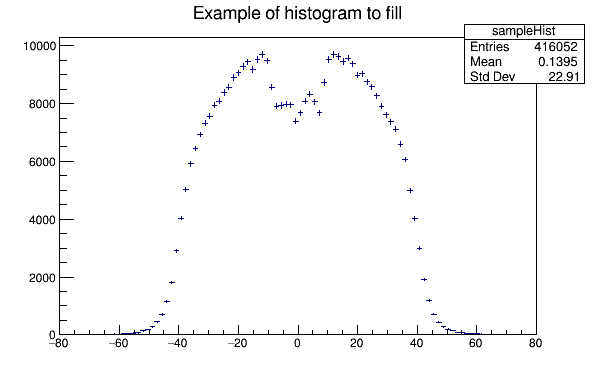

In [44]:
// draw the histogram and the canvas
sampleHist->Draw();
canvas->Draw();

In [45]:
// save the canvas as a pdf (check if the Plot folder exists)
canvas->Print("Plots/testplot.pdf"); // or png..

Info in <TCanvas::Print>: pdf file Plots/testplot.pdf has been created


In [46]:
// save the histogram to a .root file (to include in another analysis or for later plot manicure..)
TFile *OutputFile = new TFile("Plots/outputMC.root", "RECREATE"); // create output file
sampleHist->Write(); // write the histogram or other ROOT objects
OutputFile->Write(); // write the file
OutputFile->Close(); // close output file

In [47]:
// close the MC data file
MCFile->Close();

## Notes:
- In case of error try restarting the kernel and re-run all cells
- Comment / Uncomment code with ctrl+#
- Multi-cursor editing with ctrl+click

# Quantities in the TTree

| Parameter | Symbol | Description
|--|--|--
| mc_w_m | $m^{MC}_W$ | Generated w-mass  / GeV. Obviously this quantity exists only in Monte Carlo data sets
| el_e | $E_e$ | Energy of electron / GeV
| el_px | $p_x^e$ | x component of electron momentum / GeV
| el_py | $p_y^e$ | y component of electron momentum / GeV
| el_pz | $p_z^e$ | z component of electron momentum / GeV
| el_hmx7 | - | Fit result ("H Matrix") of Elektromagnetic calorimeter. This variable results from a chisquare-fit to the shower variables. For electrons this number should be small (typically < 12)
| el_emf | - | Electromagnetic energy fraction this is the fraction of shower energy seen in the electromagnetic part of the calorimeter, normalized to the full shower energy. For electrons this number should be close to 1.
| el_iso | - | Energy isolation. This variable measures the amount of energy just outside the shower, normalized to the shower energy. For isolated electrons from W decays this number should be small, say < 0.3.
| el_spatialtrackchi | $\chi^2_{\text{spat}}$ | Chiqsuare probability for track separation. This quantitiy describes how well the track measured in the tracker matches with the shower position in the calorimeter. It is the probability to find a chisquare value of the size of the observed one or a bigger one. A small number indicates poor agreement.
| el_caleta | $\eta_{\text{cal}}$ | Pseudorapidity eta measured in calorimeter
| el_calphi | $\phi_{\text{cal}}$ | Azimuthal angle phi measured in electromagnetic calorimeter
| el_eta | $\eta_e$ | Pseudorapidity eta - combined calorimeter and tracker information best eta variable - recommended for analysis
| el_phi | $\phi_e$ | Azimuthal angle phi - combined calorimeter and tracker information best phi variable - recommended for analysis
| el_charge | $q_e$ | Electric charge
| el_CC | - | Counts (number of cells fired) in central calorimeter
| el_EC | - | Counts (number of cells fired) in endcap calorimeter
| el_track_z | - | Reconstructed z-position / cm
| el_track_charge | - | Reconstructed charge (tracker)
| el_track_pt | $p_t^e$ | Reconstructed transverse momentum / GeV  (measured in tracker)
| el_track_p | $p_e$ | Reconstructed momentum / GeV (measured in tracker)
| el_track_phi | - | Reconstructed azimuthal angle phi (measured in tracker)
| el_track_eta | - | Reconstructed pseudorapidity eta (measured in tracker)
| el_track_nsmt | - | Number of hits in silicon tracker (measured in tracker)
| el_track_ncft | - | Number of hits in fiber tracker (measured in tracker)
| metx_calo | $E_x^{\text{miss}}$ | Missing transverse energy, x component, in  GeV
| mety_calo | $E_y^{\text{miss}}$ | Missing transverse energy, y component, in  GeV
| met_vertex_z | - | z-position of event vertex / cm - used for MET calculation
| el_met_calo_dphi | - | difference between azimuthal angle of electron and azimuthal angle of missing energy
| weight | - | Weights for different masses. Note the generated W masses are distributed symmetrically around 80.3946 GeV, with distances of 0.05 GeV. There are 19 weights in total: weight[0] corresponds to 79.9446 GeV ... weight[9] is at the center, corresponds to 80.3946 GeV ... weight[18] corresponds to 80.8446 GeV

# Other quantities
| Symbol | Value | Description
|--|------|--
| $m_W$ | 80.3946 GeV | W-boson mass
| $N_c$ | 3 | Color factor
| $\sigma_{th}$ | $(2.58 \pm 0.09)\,$nb | Total cross section of $pp \rightarrow W \rightarrow e \bar{\nu_e}$
| $L_{\text{int}}$ | $(198 \pm 20)\,$GeV | Integrated luminosity
| $N_{\text{gen}}$ | 1164699 | Number of generated monte carlo events
| - | $0.9 \pm 0.1$ | Correction factor
| - | $1.03 \pm 0.01$ | W-boson width correction factor
| $\sigma^{\text{syst, rel}}_E$ | 0.2\,\% | relative systematic error energy

# Breit-Wigner function
$f_{\text{BW}}(x) = \sigma \cdot \Gamma^2 \cdot \frac{x^2}{(x^2-m^2)^2 \cdot \Gamma^2}$
, with $x=\sqrt{s}$ <br />
Define in ROOT by: <br />
```
Float_t f_BreitWigner(Float_t *x, Float_t *par) {
  // x: sqrt(s), 0: sigma, 1: m, 2: Gamma
  return par[0] * pow(par[2],2) * pow(x[0],2) / (pow( pow(x[0],2) - pow(par[1],2), 2) + pow(par[1],2) * pow(par[2],2) );
}
TF1 *BreitWigner = new TF1("BreitWigner", f_BreitWigner, 0, 3, 3);
```